In [1]:
#importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ruta = 'airbnb.csv' #archivo airbnb

In [3]:
airbnb = pd.read_csv(ruta) #Lectura del Archivo

In [4]:
airbnb

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10014,10014,22307861,Lovely 1BR Harlem apartment,16004068,Rachel,"Manhattan, Harlem","(40.80379, -73.95257)",Entire home/apt,105$,4,2018-05-28,0.21,0,4.757555,4.8,0.639223,2017-11-22
10015,10015,953275,Apartment For Your Holidays in NYC!,4460034,Alain,"Manhattan, East Harlem","(40.79531, -73.9333)",Entire home/apt,125$,50,2018-05-06,0.66,188,4.344704,60.0,0.648778,2017-10-31
10016,10016,3452835,"Artsy, Garden Getaway in Central Brooklyn",666862,Amy,"Brooklyn, Clinton Hill","(40.68266, -73.96743000000002)",Entire home/apt,100$,45,2016-11-27,0.98,0,3.966214,54.0,0.631713,2016-05-24
10017,10017,23540194,"Immaculate townhouse in Clinton Hill, Brooklyn",67176930,Sophie,"Brooklyn, Clinton Hill","(40.68832, -73.96366)",Entire home/apt,450$,2,2019-05-31,0.17,99,4.078581,2.4,0.703360,2018-11-25


###Diagnosing Data

In [5]:
airbnb.dtypes

Unnamed: 0              int64
listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
dtype: object

In [6]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10019 entries, 0 to 10018
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10019 non-null  int64  
 1   listing_id          10019 non-null  int64  
 2   name                10014 non-null  object 
 3   host_id             10019 non-null  int64  
 4   host_name           10017 non-null  object 
 5   neighbourhood_full  10019 non-null  object 
 6   coordinates         10019 non-null  object 
 7   room_type           10019 non-null  object 
 8   price               9781 non-null   object 
 9   number_of_reviews   10019 non-null  int64  
 10  last_review         7944 non-null   object 
 11  reviews_per_month   7944 non-null   float64
 12  availability_365    10019 non-null  int64  
 13  rating              7944 non-null   float64
 14  number_of_stays     7944 non-null   float64
 15  5_stars             7944 non-null   float64
 16  list

In [7]:
airbnb.isna().sum() #NaNs de cada columna

Unnamed: 0               0
listing_id               0
name                     5
host_id                  0
host_name                2
neighbourhood_full       0
coordinates              0
room_type                0
price                  238
number_of_reviews        0
last_review           2075
reviews_per_month     2075
availability_365         0
rating                2075
number_of_stays       2075
5_stars               2075
listing_added            0
dtype: int64

In [8]:
airbnb["room_type"].unique() #El método lo poseén las columnas del df

array(['Private room', 'Entire home/apt', 'Private', 'Shared room',
       'PRIVATE ROOM', 'home', '   Shared room      '], dtype=object)

###Cleaning data

In [8]:
airbnb.columns

Index(['Unnamed: 0', 'listing_id', 'name', 'host_id', 'host_name',
       'neighbourhood_full', 'coordinates', 'room_type', 'price',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'availability_365', 'rating', 'number_of_stays', '5_stars',
       'listing_added'],
      dtype='object')

##Columna 'coordinates'

*   Se usó: https://blog.facialix.com/eliminar-caracteres-en-una-cadena-de-texto-en-python/#:~:text=La%20forma%20m%C3%A1s%20com%C3%BAn%20de,ocurrencias%20de%20un%20car%C3%A1cter%20dado.

junto con str.split()

In [10]:
airbnb[["coordinates"]]

,coordinates
0,"(40.63222, -73.93398)"
1,"(40.78761, -73.96862)"
2,"(40.7007, -73.99517)"
3,"(40.79169, -73.97498)"
4,"(40.71884, -73.98354)"
...,...
10014,"(40.80379, -73.95257)"
10015,"(40.79531, -73.9333)"
10016,"(40.68266, -73.96743000000002)"
10017,"(40.68832, -73.96366)"


In [11]:
#Separa por comas y separa en dos columnas
lat_long = airbnb["coordinates"].str.split(",",expand = True) 
lat_long

,0,1
0,(40.63222,-73.93398)
1,(40.78761,-73.96862)
2,(40.7007,-73.99517)
3,(40.79169,-73.97498)
4,(40.71884,-73.98354)
...,...,...
10014,(40.80379,-73.95257)
10015,(40.79531,-73.9333)
10016,(40.68266,-73.96743000000002)
10017,(40.68832,-73.96366)


In [13]:
#Reemplaza "(" por espacio vacío
lat_long.iloc[:,0].str.replace("(","")

C:\Users\MANC_\AppData\Local\Temp\ipykernel_23896\4070806800.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  lat_long.iloc[:,0].str.replace("(","")


0        40.63222
1        40.78761
2         40.7007
3        40.79169
4        40.71884
           ...   
10014    40.80379
10015    40.79531
10016    40.68266
10017    40.68832
10018    40.76174
Name: 0, Length: 10019, dtype: object

In [14]:
#Reescribimos "lat_long" sin "(" y ")" con dos columnas respectivamente
lat_long = pd.DataFrame({"Latitud": lat_long.iloc[:,0].str.replace("(",""),"Longitud":lat_long.iloc[:,1].str.replace(")","")})
lat_long

C:\Users\MANC_\AppData\Local\Temp\ipykernel_23896\735766104.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  lat_long = pd.DataFrame({"Latitud": lat_long.iloc[:,0].str.replace("(",""),"Longitud":lat_long.iloc[:,1].str.replace(")","")})


,Latitud,Longitud
0,40.63222,-73.93398
1,40.78761,-73.96862
2,40.7007,-73.99517
3,40.79169,-73.97498
4,40.71884,-73.98354
...,...,...
10014,40.80379,-73.95257
10015,40.79531,-73.9333
10016,40.68266,-73.96743000000002
10017,40.68832,-73.96366


In [18]:
lat_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10019 entries, 0 to 10018
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Latitud   10019 non-null  object
 1   Longitud  10019 non-null  object
dtypes: object(2)
memory usage: 156.7+ KB


In [20]:
lat_long = lat_long.astype(float, errors = 'raise') #convertimos los valores a flotante
lat_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10019 entries, 0 to 10018
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Latitud   10019 non-null  float64
 1   Longitud  10019 non-null  float64
dtypes: float64(2)
memory usage: 156.7 KB


In [21]:
#Drop columna "coordinates"
airbnb.drop("coordinates", axis = 1, inplace = True)

In [22]:
airbnb.columns

Index(['Unnamed: 0', 'listing_id', 'name', 'host_id', 'host_name',
       'neighbourhood_full', 'room_type', 'price', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'availability_365', 'rating',
       'number_of_stays', '5_stars', 'listing_added'],
      dtype='object')


Ahora podemos concatenar las columnas de "lat_long" con "airbnb"

In [25]:
airbnb = pd.concat([airbnb,lat_long], axis = 1) #Se actualiza "airbnb"
airbnb

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,Latitud,Longitud
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.70070,-73.99517
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10014,10014,22307861,Lovely 1BR Harlem apartment,16004068,Rachel,"Manhattan, Harlem",Entire home/apt,105$,4,2018-05-28,0.21,0,4.757555,4.8,0.639223,2017-11-22,40.80379,-73.95257
10015,10015,953275,Apartment For Your Holidays in NYC!,4460034,Alain,"Manhattan, East Harlem",Entire home/apt,125$,50,2018-05-06,0.66,188,4.344704,60.0,0.648778,2017-10-31,40.79531,-73.93330
10016,10016,3452835,"Artsy, Garden Getaway in Central Brooklyn",666862,Amy,"Brooklyn, Clinton Hill",Entire home/apt,100$,45,2016-11-27,0.98,0,3.966214,54.0,0.631713,2016-05-24,40.68266,-73.96743
10017,10017,23540194,"Immaculate townhouse in Clinton Hill, Brooklyn",67176930,Sophie,"Brooklyn, Clinton Hill",Entire home/apt,450$,2,2019-05-31,0.17,99,4.078581,2.4,0.703360,2018-11-25,40.68832,-73.96366


##Columna 'price'

In [26]:
airbnb[['price']]

,price
0,45$
1,135$
2,150$
3,86$
4,160$
...,...
10014,105$
10015,125$
10016,100$
10017,450$


In [27]:
#Quitamos el signo $ y convertimos a float los valores
airbnb['price'] = airbnb['price'].str.replace("$","").astype(float,errors = 'raise')
airbnb[['price']]

C:\Users\MANC_\AppData\Local\Temp\ipykernel_23896\2144471439.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  airbnb['price'] = airbnb['price'].str.replace("$","").astype(float,errors = 'raise')


,price
0,45.0
1,135.0
2,150.0
3,86.0
4,160.0
...,...
10014,105.0
10015,125.0
10016,100.0
10017,450.0


In [28]:
airbnb['price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10019 entries, 0 to 10018
Series name: price
Non-Null Count  Dtype  
--------------  -----  
9781 non-null   float64
dtypes: float64(1)
memory usage: 78.4 KB


In [29]:
airbnb['price'].isna().sum() #Número de NaNs

238

In [30]:
airbnb['price'].mean() #obtenemos la media de los valores presenntes. Pdríamos asignar este valor a los NaNs

150.90512217564665

##Columnas 'listing_added' y 'last_review' a date_time

Columna 'listing_added'

In [35]:
airbnb[['listing_added']]

,listing_added
0,2018-06-08
1,2018-12-25
2,2018-08-15
3,2017-03-20
4,2020-10-23
...,...
10014,2017-11-22
10015,2017-10-31
10016,2016-05-24
10017,2018-11-25


In [31]:
airbnb[['listing_added']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10019 entries, 0 to 10018
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_added  10019 non-null  object
dtypes: object(1)
memory usage: 78.4+ KB


In [33]:
airbnb['listing_added'] = pd.to_datetime(airbnb['listing_added'],format = '%Y-%m-%d') #Le asignamos formato de fecha

In [34]:
airbnb['listing_added'].info() #Formato de datos datetime

<class 'pandas.core.series.Series'>
RangeIndex: 10019 entries, 0 to 10018
Series name: listing_added
Non-Null Count  Dtype         
--------------  -----         
10019 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.4 KB


Columna 'last_review'

In [36]:
airbnb[['last_review']]

,last_review
0,2018-12-12
1,2019-06-30
2,NaN
3,2017-09-23
4,2019-06-12
...,...
10014,2018-05-28
10015,2018-05-06
10016,2016-11-27
10017,2019-05-31


In [37]:
airbnb[['last_review']].info() #Existen NaNs y sus valores son tipo objeto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10019 entries, 0 to 10018
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   last_review  7944 non-null   object
dtypes: object(1)
memory usage: 78.4+ KB


In [38]:
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'],format = '%Y-%m-%d') #Formato de fecha

In [39]:
airbnb[['last_review']]

,last_review
0,2018-12-12
1,2019-06-30
2,NaT
3,2017-09-23
4,2019-06-12
...,...
10014,2018-05-28
10015,2018-05-06
10016,2016-11-27
10017,2019-05-31


In [40]:
airbnb[['last_review']].info() #Formato de datos datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10019 entries, 0 to 10018
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   last_review  7944 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.4 KB


In [41]:
airbnb[['last_review']].isna().sum() #Número de NaNs

last_review    2075
dtype: int64

###Consistency

##Columna "room_type", Reemplazar con 'Shared room', 'Entire place', 'Private room' and 'Hotel room' (if applicable)

El método df['a'].unique() lo poseén las columnas para ver todos los valores (sin repetición) que toman

In [42]:
airbnb["room_type"].unique() 

array(['Private room', 'Entire home/apt', 'Private', 'Shared room',
       'PRIVATE ROOM', 'home', '   Shared room      '], dtype=object)

In [43]:
#Reemplazo de las variantes de 'Private room' hacia este mismo valor
airbnb[["room_type"]] = airbnb[["room_type"]].replace(['Private', 'PRIVATE ROOM'], 'Private room')

In [44]:
airbnb["room_type"].unique() #Solo 'Private room'

array(['Private room', 'Entire home/apt', 'Shared room', 'home',
       '   Shared room      '], dtype=object)

In [45]:
#Reemplazo de las variantes de 'Entire place' hacia este mismo valor 
airbnb[["room_type"]] = airbnb[["room_type"]].replace('Entire home/apt','Entire place')

In [46]:
airbnb["room_type"].unique()

array(['Private room', 'Entire place', 'Shared room', 'home',
       '   Shared room      '], dtype=object)

In [47]:
#Reemplazo de las variantes de 'Shared room' hacia este mismo valor 
airbnb[["room_type"]] = airbnb[["room_type"]].replace('   Shared room      ','Shared room')

In [48]:
airbnb["room_type"].unique()

array(['Private room', 'Entire place', 'Shared room', 'home'],
      dtype=object)

##Columna 'neighbourhood_full'

In [49]:
airbnb[["neighbourhood_full"]]

,neighbourhood_full
0,"Brooklyn, Flatlands"
1,"Manhattan, Upper West Side"
2,"Brooklyn, Brooklyn Heights"
3,"Manhattan, Upper West Side"
4,"Manhattan, Lower East Side"
...,...
10014,"Manhattan, Harlem"
10015,"Manhattan, East Harlem"
10016,"Brooklyn, Clinton Hill"
10017,"Brooklyn, Clinton Hill"


In [50]:
airbnb[["neighbourhood_full"]].isna().sum()

neighbourhood_full    0
dtype: int64

In [51]:
#Separamos por ","" generando las columnas "Borough" y "Neighbourhood"
vecindario = airbnb["neighbourhood_full"].str.split(",",expand = True)
vecindario.columns = ["Borough","Neighbourhood"]
vecindario

,Borough,Neighbourhood
0,Brooklyn,Flatlands
1,Manhattan,Upper West Side
2,Brooklyn,Brooklyn Heights
3,Manhattan,Upper West Side
4,Manhattan,Lower East Side
...,...,...
10014,Manhattan,Harlem
10015,Manhattan,East Harlem
10016,Brooklyn,Clinton Hill
10017,Brooklyn,Clinton Hill


In [52]:
vecindario['Borough'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [53]:
vecindario['Neighbourhood'].unique() #Vemos que hay espacios en blancos al inicio

array([' Flatlands', ' Upper West Side', ' Brooklyn Heights',
       ' Lower East Side', ' Greenwich Village', ' Harlem',
       ' Sheepshead Bay', ' Theater District', ' Bushwick', ' Laurelton',
       ' Mott Haven', ' Flushing', ' Crown Heights', ' Midtown',
       ' Financial District', ' East Village', ' Park Slope',
       ' Washington Heights', ' Williamsburg', ' Chelsea',
       ' Bedford-Stuyvesant', ' Gowanus', ' Upper East Side',
       ' Ditmars Steinway', ' Cypress Hills', " Hell's Kitchen",
       ' Ridgewood', ' Marble Hill', ' Kips Bay', ' Prospect Heights',
       ' East New York', ' Concord', ' Stapleton', ' Astoria',
       ' East Harlem', ' Sunnyside', ' Gramercy',
       ' Prospect-Lefferts Gardens', ' Sunset Park', ' Forest Hills',
       ' Windsor Terrace', ' Clinton Hill', ' Murray Hill',
       ' Flatiron District', ' Greenpoint', ' East Flatbush', ' Tribeca',
       ' Woodhaven', ' Fort Greene', ' Inwood', ' Chinatown',
       ' Rockaway Beach', ' Woodside', ' 

Con el método strip quitamos espacios en blanco al inicio y al final, observemos que 'Borough' no los tiene pero 'Neighbourhood' sí, ver link: https://lineadecodigo.com/python/eliminar-espacios-en-blanco-con-python/

In [54]:
vecindario['Neighbourhood'].str.strip().unique() #Quitamos espacios en blanco al inicio

array(['Flatlands', 'Upper West Side', 'Brooklyn Heights',
       'Lower East Side', 'Greenwich Village', 'Harlem', 'Sheepshead Bay',
       'Theater District', 'Bushwick', 'Laurelton', 'Mott Haven',
       'Flushing', 'Crown Heights', 'Midtown', 'Financial District',
       'East Village', 'Park Slope', 'Washington Heights', 'Williamsburg',
       'Chelsea', 'Bedford-Stuyvesant', 'Gowanus', 'Upper East Side',
       'Ditmars Steinway', 'Cypress Hills', "Hell's Kitchen", 'Ridgewood',
       'Marble Hill', 'Kips Bay', 'Prospect Heights', 'East New York',
       'Concord', 'Stapleton', 'Astoria', 'East Harlem', 'Sunnyside',
       'Gramercy', 'Prospect-Lefferts Gardens', 'Sunset Park',
       'Forest Hills', 'Windsor Terrace', 'Clinton Hill', 'Murray Hill',
       'Flatiron District', 'Greenpoint', 'East Flatbush', 'Tribeca',
       'Woodhaven', 'Fort Greene', 'Inwood', 'Chinatown',
       'Rockaway Beach', 'Woodside', 'Bayside', 'Bensonhurst', 'SoHo',
       'Red Hook', 'West Village', 

In [55]:
#Sustituimos la columna con sus nuevos valores 
vecindario['Neighbourhood'] = vecindario['Neighbourhood'].str.strip()
vecindario

,Borough,Neighbourhood
0,Brooklyn,Flatlands
1,Manhattan,Upper West Side
2,Brooklyn,Brooklyn Heights
3,Manhattan,Upper West Side
4,Manhattan,Lower East Side
...,...,...
10014,Manhattan,Harlem
10015,Manhattan,East Harlem
10016,Brooklyn,Clinton Hill
10017,Brooklyn,Clinton Hill


In [56]:
vecindario['Neighbourhood'].unique() #Ya no aparecen los espacios en blanco

array(['Flatlands', 'Upper West Side', 'Brooklyn Heights',
       'Lower East Side', 'Greenwich Village', 'Harlem', 'Sheepshead Bay',
       'Theater District', 'Bushwick', 'Laurelton', 'Mott Haven',
       'Flushing', 'Crown Heights', 'Midtown', 'Financial District',
       'East Village', 'Park Slope', 'Washington Heights', 'Williamsburg',
       'Chelsea', 'Bedford-Stuyvesant', 'Gowanus', 'Upper East Side',
       'Ditmars Steinway', 'Cypress Hills', "Hell's Kitchen", 'Ridgewood',
       'Marble Hill', 'Kips Bay', 'Prospect Heights', 'East New York',
       'Concord', 'Stapleton', 'Astoria', 'East Harlem', 'Sunnyside',
       'Gramercy', 'Prospect-Lefferts Gardens', 'Sunset Park',
       'Forest Hills', 'Windsor Terrace', 'Clinton Hill', 'Murray Hill',
       'Flatiron District', 'Greenpoint', 'East Flatbush', 'Tribeca',
       'Woodhaven', 'Fort Greene', 'Inwood', 'Chinatown',
       'Rockaway Beach', 'Woodside', 'Bayside', 'Bensonhurst', 'SoHo',
       'Red Hook', 'West Village', 

In [57]:
airbnb.drop('neighbourhood_full', axis = 1, inplace = True) #Drop a la columna 'neighbourhood_full'

In [58]:
airbnb.columns

Index(['Unnamed: 0', 'listing_id', 'name', 'host_id', 'host_name', 'room_type',
       'price', 'number_of_reviews', 'last_review', 'reviews_per_month',
       'availability_365', 'rating', 'number_of_stays', '5_stars',
       'listing_added', 'Latitud', 'Longitud'],
      dtype='object')


ahora es posible concatenar el df "vecindario" con el de "airbnb" 

In [59]:
airbnb = pd.concat([airbnb,vecindario], axis = 1) #Se actualiza "airbnb"
airbnb

,Unnamed: 0,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,Latitud,Longitud,Borough,Neighbourhood
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,Private room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398,Brooklyn,Flatlands
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,Entire place,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862,Manhattan,Upper West Side
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,Entire place,150.0,0,NaT,NaN,65,NaN,NaN,NaN,2018-08-15,40.70070,-73.99517,Brooklyn,Brooklyn Heights
3,3,6425850,"Spacious, charming studio",32715865,Yelena,Entire place,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498,Manhattan,Upper West Side
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,Private room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354,Manhattan,Lower East Side
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10014,10014,22307861,Lovely 1BR Harlem apartment,16004068,Rachel,Entire place,105.0,4,2018-05-28,0.21,0,4.757555,4.8,0.639223,2017-11-22,40.80379,-73.95257,Manhattan,Harlem
10015,10015,953275,Apartment For Your Holidays in NYC!,4460034,Alain,Entire place,125.0,50,2018-05-06,0.66,188,4.344704,60.0,0.648778,2017-10-31,40.79531,-73.93330,Manhattan,East Harlem
10016,10016,3452835,"Artsy, Garden Getaway in Central Brooklyn",666862,Amy,Entire place,100.0,45,2016-11-27,0.98,0,3.966214,54.0,0.631713,2016-05-24,40.68266,-73.96743,Brooklyn,Clinton Hill
10017,10017,23540194,"Immaculate townhouse in Clinton Hill, Brooklyn",67176930,Sophie,Entire place,450.0,2,2019-05-31,0.17,99,4.078581,2.4,0.703360,2018-11-25,40.68832,-73.96366,Brooklyn,Clinton Hill


##Columna 'rating'

In [60]:
airbnb[["rating"]]

,rating
0,4.100954
1,3.367600
2,NaN
3,4.763203
4,3.822591
...,...
10014,4.757555
10015,4.344704
10016,3.966214
10017,4.078581


In [61]:
airbnb[["rating"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10019 entries, 0 to 10018
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  7944 non-null   float64
dtypes: float64(1)
memory usage: 78.4 KB


In [62]:
airbnb[["rating"]].isna().sum()

rating    2075
dtype: int64

In [64]:
airbnb[ (0 < airbnb["rating"]) & (airbnb["rating"] <5) ] #Filas con valores de rating entre 0 y 5 contemplándolos

,Unnamed: 0,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,Latitud,Longitud,Borough,Neighbourhood
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,Private room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398,Brooklyn,Flatlands
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,Entire place,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862,Manhattan,Upper West Side
3,3,6425850,"Spacious, charming studio",32715865,Yelena,Entire place,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498,Manhattan,Upper West Side
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,Private room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354,Manhattan,Lower East Side
5,5,271954,Beautiful brownstone apartment,1423798,Aj,Entire place,150.0,203,2019-06-20,2.22,300,4.478396,243.6,0.743500,2018-12-15,40.73388,-73.99452,Manhattan,Greenwich Village
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10014,10014,22307861,Lovely 1BR Harlem apartment,16004068,Rachel,Entire place,105.0,4,2018-05-28,0.21,0,4.757555,4.8,0.639223,2017-11-22,40.80379,-73.95257,Manhattan,Harlem
10015,10015,953275,Apartment For Your Holidays in NYC!,4460034,Alain,Entire place,125.0,50,2018-05-06,0.66,188,4.344704,60.0,0.648778,2017-10-31,40.79531,-73.93330,Manhattan,East Harlem
10016,10016,3452835,"Artsy, Garden Getaway in Central Brooklyn",666862,Amy,Entire place,100.0,45,2016-11-27,0.98,0,3.966214,54.0,0.631713,2016-05-24,40.68266,-73.96743,Brooklyn,Clinton Hill
10017,10017,23540194,"Immaculate townhouse in Clinton Hill, Brooklyn",67176930,Sophie,Entire place,450.0,2,2019-05-31,0.17,99,4.078581,2.4,0.703360,2018-11-25,40.68832,-73.96366,Brooklyn,Clinton Hill


In [65]:
2075+7941 #NaNs más la condición de arriba


10016

In [68]:
#Valor Máximo de esta selección en la columna de 'rating'
airbnb[ (0 < airbnb["rating"]) & (airbnb["rating"] <5) ]['rating'].max()

4.999561104773598

In [69]:
airbnb[ (0 < airbnb["rating"]) & (airbnb["rating"] <5) ]['rating'].min()#Valor mínimo de esta selección

3.0006328518730045

In [70]:
#con la media siguiente podría ser asignada a los NaNs
airbnb[ (0 < airbnb["rating"]) & (airbnb["rating"] <5) ]['rating'].mean()#Máximo de la tabla anterior

4.014049909586275

Ploteamos un histograma de 'rating'

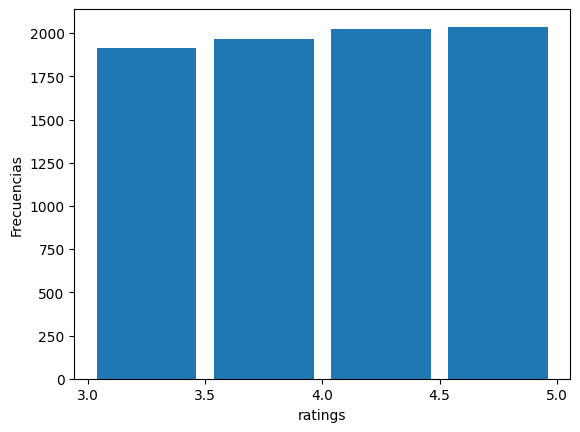

In [72]:
    """
    El plot se hace con la selección de valores entre 0 y 5 contemplándolos y con intervalos de 1.5, iniciando
    en 3 y terminando en 5 (valor máximo)
    """
intervalos = [3,3.5,4,4.5,5]
airbnb[ (0 < airbnb["rating"]) & (airbnb["rating"] <5) ]['rating'].plot.hist(bins = intervalos,  rwidth=0.85)
plt.xticks(intervalos)
plt.ylabel('Frecuencias')
plt.xlabel('ratings')
#plt.title('Histograma de edades - pandas - codigopiton.com')

plt.show()

Drop a los valores mayores a 5 y menores a 0 en la columna "rating"

In [74]:
airbnb[(5 < airbnb["rating"] ) | (0 > airbnb["rating"]) ] #Filas con valores de rating mayor a 5 y menor que 0

,Unnamed: 0,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,Latitud,Longitud,Borough,Neighbourhood
1925,1925,36411407,Brand new 1 bedroom steps from Soho!,33917435,Mike,Entire place,150.0,1,2019-07-06,1.0,13,5.017040,1.2,0.870161,2018-12-31,40.71825,-73.99019,Manhattan,Lower East Side
6732,6732,36390226,Comfortable clean Bedstuy private room,267932490,Angela,Private room,45.0,2,2019-07-08,2.0,14,5.087091,2.4,0.950339,2019-01-02,40.69551,-73.93951,Brooklyn,Bedford-Stuyvesant
8821,8821,36413632,Spacious 2BR in Beautiful Brooklyn Heights,6608220,Matt,Entire place,550.0,1,2019-07-07,1.0,230,5.181114,1.2,0.805418,2019-01-01,40.69827,-73.99649,Brooklyn,Brooklyn Heights


In [76]:
#airbnb.drop(lista_de_índices, axis = 0 (filas), inplace = True)
airbnb.drop(airbnb[(5 < airbnb["rating"] ) | (0 > airbnb["rating"])].index, axis = 0, inplace = True)

In [77]:
airbnb[(5 < airbnb["rating"] ) | (0 > airbnb["rating"])] #Sin datos...

,Unnamed: 0,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,Latitud,Longitud,Borough,Neighbourhood


In [81]:
airbnb.reset_index(drop=True, inplace=True) #Reseteamos los índices

In [82]:
airbnb

,Unnamed: 0,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,Latitud,Longitud,Borough,Neighbourhood
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,Private room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398,Brooklyn,Flatlands
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,Entire place,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862,Manhattan,Upper West Side
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,Entire place,150.0,0,NaT,NaN,65,NaN,NaN,NaN,2018-08-15,40.70070,-73.99517,Brooklyn,Brooklyn Heights
3,3,6425850,"Spacious, charming studio",32715865,Yelena,Entire place,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498,Manhattan,Upper West Side
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,Private room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354,Manhattan,Lower East Side
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10011,10014,22307861,Lovely 1BR Harlem apartment,16004068,Rachel,Entire place,105.0,4,2018-05-28,0.21,0,4.757555,4.8,0.639223,2017-11-22,40.80379,-73.95257,Manhattan,Harlem
10012,10015,953275,Apartment For Your Holidays in NYC!,4460034,Alain,Entire place,125.0,50,2018-05-06,0.66,188,4.344704,60.0,0.648778,2017-10-31,40.79531,-73.93330,Manhattan,East Harlem
10013,10016,3452835,"Artsy, Garden Getaway in Central Brooklyn",666862,Amy,Entire place,100.0,45,2016-11-27,0.98,0,3.966214,54.0,0.631713,2016-05-24,40.68266,-73.96743,Brooklyn,Clinton Hill
10014,10017,23540194,"Immaculate townhouse in Clinton Hill, Brooklyn",67176930,Sophie,Entire place,450.0,2,2019-05-31,0.17,99,4.078581,2.4,0.703360,2018-11-25,40.68832,-73.96366,Brooklyn,Clinton Hill


###Duplicados

In [78]:
airbnb.columns

Index(['Unnamed: 0', 'listing_id', 'name', 'host_id', 'host_name', 'room_type',
       'price', 'number_of_reviews', 'last_review', 'reviews_per_month',
       'availability_365', 'rating', 'number_of_stays', '5_stars',
       'listing_added', 'Latitud', 'Longitud', 'Borough', 'Neighbourhood'],
      dtype='object')

In [83]:
airbnb.drop('Unnamed: 0', axis = 1, inplace = True) #Drop 'Unnamed' pues causaría conflictos al buscar duplicados

In [84]:
total_dup = airbnb[airbnb.duplicated(airbnb.columns)] #Sin especificar la columna nos entrega Filas duplicadas
total_dup

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,Latitud,Longitud,Borough,Neighbourhood
3006,17861841,THE CREATIVE COZY ROOM,47591528,Janessa,Private room,99.0,13,2019-05-23,0.52,82,4.806590,15.6,0.937422,2018-11-17,40.59211,-73.94127,Brooklyn,Sheepshead Bay
3339,35646737,"Private Cabins @ Chelsea, Manhattan",117365574,Maria,Private room,85.0,1,2019-06-22,1.00,261,4.951714,1.2,0.671388,2018-12-17,40.74946,-73.99627,Manhattan,Chelsea
5076,33831116,Sonder | Stock Exchange | Collected 1BR + Laundry,219517861,Sonder (NYC),Entire place,229.0,5,2019-06-15,1.92,350,4.026379,6.0,0.601737,2018-12-10,40.70621,-74.01199,Manhattan,Financial District
5396,16518377,East Village 1BR Apt with all the amenities,3012457,Cody,Entire place,200.0,3,2018-07-10,0.16,0,4.676670,3.6,0.694443,2018-01-04,40.72350,-73.97963,Manhattan,East Village
6067,22014840,Sunny Bedroom Only 1 Metro Stop to Manhattan,32093643,Scarlett,Private room,70.0,2,2018-01-07,0.11,0,4.024336,2.4,0.719426,2017-07-04,40.76211,-73.94887,Manhattan,Roosevelt Island
6084,33346762,2BR Apartment in Brownstone Brooklyn!,50321289,Avery,Entire place,140.0,4,2019-06-14,1.58,4,4.013393,4.8,0.719591,2018-12-09,40.68200,-73.95681,Brooklyn,Bedford-Stuyvesant
6131,23990868,1 Bedroom in Luxury Building,4447548,Grace,Entire place,88.0,8,2019-06-16,0.56,18,4.164548,9.6,0.640106,2018-12-11,40.69336,-73.94453,Brooklyn,Bedford-Stuyvesant
6312,32610834,Manhattan by the water!,12132369,Omar,Entire place,150.0,0,NaT,NaN,9,NaN,NaN,NaN,2018-06-28,40.73767,-73.97384,Manhattan,Kips Bay
6437,19477677,Huge sunny room next to subway!,25038748,Justin,Private room,70.0,11,2019-05-11,0.45,0,3.074890,13.2,0.631619,2018-11-05,40.82119,-73.95583,Manhattan,Harlem
6561,253806,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Entire place,199.0,43,2019-07-02,0.47,60,4.620238,51.6,0.861086,2018-12-27,40.73652,-73.95236,Brooklyn,Greenpoint


In [85]:
listing_id_dup = airbnb[airbnb.duplicated('listing_id')] #Duplicados buscando la columna 'listing_id'
listing_id_dup

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,Latitud,Longitud,Borough,Neighbourhood
2254,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,Entire place,280.0,4,2016-05-22,0.09,225,3.903764,4.8,0.756381,2015-11-17,40.73813,-73.98098,Manhattan,Kips Bay
3006,17861841,THE CREATIVE COZY ROOM,47591528,Janessa,Private room,99.0,13,2019-05-23,0.52,82,4.806590,15.6,0.937422,2018-11-17,40.59211,-73.94127,Brooklyn,Sheepshead Bay
3339,35646737,"Private Cabins @ Chelsea, Manhattan",117365574,Maria,Private room,85.0,1,2019-06-22,1.00,261,4.951714,1.2,0.671388,2018-12-17,40.74946,-73.99627,Manhattan,Chelsea
3429,15027024,Newly renovated 1bd on lively & historic St Marks,8344620,Ethan,Entire place,180.0,10,2018-12-31,0.30,0,3.869729,12.0,0.772513,2018-06-27,40.72693,-73.98385,Manhattan,East Village
4186,4244242,Best Bedroom in Bedstuy/Bushwick. Ensuite bath...,22023014,BrooklynSleeps,Private room,73.0,110,2019-06-23,1.96,323,4.962314,132.0,0.809882,2018-12-18,40.69496,-73.93949,Brooklyn,Bedford-Stuyvesant
5076,33831116,Sonder | Stock Exchange | Collected 1BR + Laundry,219517861,Sonder (NYC),Entire place,229.0,5,2019-06-15,1.92,350,4.026379,6.0,0.601737,2018-12-10,40.70621,-74.01199,Manhattan,Financial District
5396,16518377,East Village 1BR Apt with all the amenities,3012457,Cody,Entire place,200.0,3,2018-07-10,0.16,0,4.676670,3.6,0.694443,2018-01-04,40.72350,-73.97963,Manhattan,East Village
6067,22014840,Sunny Bedroom Only 1 Metro Stop to Manhattan,32093643,Scarlett,Private room,70.0,2,2018-01-07,0.11,0,4.024336,2.4,0.719426,2017-07-04,40.76211,-73.94887,Manhattan,Roosevelt Island
6084,33346762,2BR Apartment in Brownstone Brooklyn!,50321289,Avery,Entire place,140.0,4,2019-06-14,1.58,4,4.013393,4.8,0.719591,2018-12-09,40.68200,-73.95681,Brooklyn,Bedford-Stuyvesant
6131,23990868,1 Bedroom in Luxury Building,4447548,Grace,Entire place,88.0,8,2019-06-16,0.56,18,4.164548,9.6,0.640106,2018-12-11,40.69336,-73.94453,Brooklyn,Bedford-Stuyvesant


###Análisis de duplicados

Se puede ver que la lista de duplicados utilizando todas las  columnas es una sublista si tomamos la columna 
'listin_id', esto parece un poco raro, sin embargo podemos observar todo lo siguiente en la parte de abajo.

El número de 'listing_id' 7319856 aparece en la lista de duplicados de 'listing_id' pero NO en la lista general, por lo que al seleccionar todos los elementos en el df 'airbnb' con ese valor aparecen dos observaciones (ver enseguida) en la que coinciden en todos los valores menos en la columna 'price', ya que la diferencia es de 9 dolares, por lo que esto podría indicar un error de captura y así evitar ser considerado como observación repetida

In [87]:
airbnb.loc[airbnb['listing_id'] == 7319856]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,Latitud,Longitud,Borough,Neighbourhood
77,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,Entire place,289.0,4,2016-05-22,0.09,225,3.903764,4.8,0.756381,2015-11-17,40.73813,-73.98098,Manhattan,Kips Bay
2254,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,Entire place,280.0,4,2016-05-22,0.09,225,3.903764,4.8,0.756381,2015-11-17,40.73813,-73.98098,Manhattan,Kips Bay


Un caso parecido ocurre con el número de 'listing_id' 15027024, ya que los valores en todas las columnas coinciden en todo menos en la columna 'rating' ya que los dos valores difieren en una cifra, a saber un 8 y un 9, lo cual parece indicar un error de captura

In [88]:
airbnb.loc[airbnb['listing_id'] == 15027024]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,Latitud,Longitud,Borough,Neighbourhood
1481,15027024,Newly renovated 1bd on lively & historic St Marks,8344620,Ethan,Entire place,180.0,10,2018-12-31,0.3,0,3.969729,12.0,0.772513,2018-06-27,40.72693,-73.98385,Manhattan,East Village
3429,15027024,Newly renovated 1bd on lively & historic St Marks,8344620,Ethan,Entire place,180.0,10,2018-12-31,0.3,0,3.869729,12.0,0.772513,2018-06-27,40.72693,-73.98385,Manhattan,East Village


Al hacer estas observaciones parece más conveniente remover los duplicados proporcionados por la columna 'listing_id'

In [89]:
listing_id_dup.index

Int64Index([2254, 3006, 3339, 3429, 4186, 5076, 5396, 6067, 6084, 6131, 6312,
            6437, 6561, 6830, 7767, 7931, 8697, 9262, 9319, 9422],
           dtype='int64')

In [90]:
#airbnb.drop(lista_de_índices, axis = 0 (filas), inplace = True)
airbnb.drop(listing_id_dup.index, axis = 0, inplace = True)
airbnb.reset_index(drop=True, inplace=True) #Reseteamos los índices

##airbnb sin duplicados considerando la columna 'listing_id'

In [91]:
airbnb

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,Latitud,Longitud,Borough,Neighbourhood
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,Private room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398,Brooklyn,Flatlands
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,Entire place,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862,Manhattan,Upper West Side
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,Entire place,150.0,0,NaT,NaN,65,NaN,NaN,NaN,2018-08-15,40.70070,-73.99517,Brooklyn,Brooklyn Heights
3,6425850,"Spacious, charming studio",32715865,Yelena,Entire place,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498,Manhattan,Upper West Side
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,Private room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354,Manhattan,Lower East Side
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,22307861,Lovely 1BR Harlem apartment,16004068,Rachel,Entire place,105.0,4,2018-05-28,0.21,0,4.757555,4.8,0.639223,2017-11-22,40.80379,-73.95257,Manhattan,Harlem
9992,953275,Apartment For Your Holidays in NYC!,4460034,Alain,Entire place,125.0,50,2018-05-06,0.66,188,4.344704,60.0,0.648778,2017-10-31,40.79531,-73.93330,Manhattan,East Harlem
9993,3452835,"Artsy, Garden Getaway in Central Brooklyn",666862,Amy,Entire place,100.0,45,2016-11-27,0.98,0,3.966214,54.0,0.631713,2016-05-24,40.68266,-73.96743,Brooklyn,Clinton Hill
9994,23540194,"Immaculate townhouse in Clinton Hill, Brooklyn",67176930,Sophie,Entire place,450.0,2,2019-05-31,0.17,99,4.078581,2.4,0.703360,2018-11-25,40.68832,-73.96366,Brooklyn,Clinton Hill
